In [1]:
import sys, os
import numpy as np
sys.path.append('../src/')
import torch
from MolGraphNetwork import MolGraphNetwork
from scf_guess_tools import Backend

BASIS_PATH = "pcseg-1"
GEOMETRY_Source = "/home/etschgi1/REPOS/Masterarbeit/datasets/QM9/xyz_c7h10o2_sorted"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MGNN = MolGraphNetwork(xyz_source=GEOMETRY_Source,
                       basis=BASIS_PATH,
                       backend=Backend.PY,
                       batch_size=16,
                       hidden_dim=256,
                       train_val_test_ratio=(0.8, 0.1, 0.1), 
                       message_passing_steps=3,
                       edge_threshold_val=5,
                       message_net_layers=3,
                       message_net_dropout=0.1,
                       target="fock",
                       verbose_level=2)
MGNN.load_data(max_samples=500,
               cache_meta = {"method":"dft", "basis":None, "functional": "b3lypg", "guess": "minao", "backend": "pyscf", "cache": "/home/etschgi1/REPOS/Masterarbeit/datasets/QM9/out/c7h10o2_b3lypg_pcseg1/pyscf"})

Setting verbose level to: 2
Loading 6095 files from /home/etschgi1/REPOS/Masterarbeit/datasets/QM9/xyz_c7h10o2_sorted...
Limiting to 500 samples out of 6095 total files.


Loading files: 100%|██████████| 500/500 [00:00<00:00, 1155.88it/s]
Creating graphs: 500it [00:06, 77.74it/s]


Total samples: 500, Train: 400, Val: 50, Test: 50
Found 3 center keys (['C', 'H', 'O']) and 6 edge keys (['C_C', 'C_H', 'C_O', 'H_H', 'H_O', 'O_O']) in the training set. -> Totaling 9 unique encoder/decoder.
Normalization factors computed and applied.
Center stats: {'C': (0.15901810980978467, 0.3491067062811783), 'H': (0.376943039894104, 0.46880099786953644), 'O': (0.15833881823789506, 0.3483205718277696)}, Edge stats: {'C_C': (0.005134553565423481, 0.0889675083102608), 'C_H': (0.00834677313786791, 0.08766453453163513), 'C_O': (0.002090464134651648, 0.06415885490836759), 'H_H': (0.011921217465338906, 0.057036713807302165), 'H_O': (0.0027484030003733745, 0.04566583105516226), 'O_O': (-0.0003316036761995212, 0.016086349758749653)}
First train batch: 304 atoms, 5036 edges, 304 center blocks.
Found center block size 105 for atom type O.
Found center block size 105 for atom type C.
Found center block size 15 for atom type H.
Found edge block size 196 for edge type O_O.
Found edge block size

In [2]:
RETRAIN = True
model_name = "MGNN_pcseg1_simple"
if not RETRAIN and os.path.exists(f"/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/{model_name}.pth"):
    MGNN.load_model(f"/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/{model_name}.pth")
else:
    MGNN.train_model(num_epochs=400, lr=1e-3, weight_decay=1e-5, model_save_path=f"/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/{model_name}.pth")
    MGNN.save_model(f"/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/{model_name}.pth")

Epoch 1 [Train]: 100%|██████████| 25/25 [00:35<00:00,  1.43s/it]


Epoch 1/400 → Avg Train Loss: 120.477512


Epoch 1 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.78it/s]


Epoch 1/400 → Avg Val   Loss: 43.003898
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 2 [Train]: 100%|██████████| 25/25 [00:35<00:00,  1.43s/it]


Epoch 2/400 → Avg Train Loss: 27.572727


Epoch 2 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.75it/s]


Epoch 2/400 → Avg Val   Loss: 17.936213
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 3 [Train]: 100%|██████████| 25/25 [00:35<00:00,  1.41s/it]


Epoch 3/400 → Avg Train Loss: 15.155121


Epoch 3 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.27it/s]


Epoch 3/400 → Avg Val   Loss: 12.982742
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 4 [Train]: 100%|██████████| 25/25 [00:36<00:00,  1.45s/it]


Epoch 4/400 → Avg Train Loss: 11.919945


Epoch 4 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.49it/s]


Epoch 4/400 → Avg Val   Loss: 11.018418
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 5 [Train]: 100%|██████████| 25/25 [00:37<00:00,  1.48s/it]


Epoch 5/400 → Avg Train Loss: 10.237296


Epoch 5 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.84it/s]


Epoch 5/400 → Avg Val   Loss: 9.741559
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 6 [Train]: 100%|██████████| 25/25 [00:37<00:00,  1.51s/it]


Epoch 6/400 → Avg Train Loss: 9.143352


Epoch 6 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.17it/s]


Epoch 6/400 → Avg Val   Loss: 8.898243
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 7 [Train]: 100%|██████████| 25/25 [00:37<00:00,  1.48s/it]


Epoch 7/400 → Avg Train Loss: 8.435844


Epoch 7 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.53it/s]


Epoch 7/400 → Avg Val   Loss: 8.329115
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 8 [Train]: 100%|██████████| 25/25 [00:36<00:00,  1.47s/it]


Epoch 8/400 → Avg Train Loss: 7.970947


Epoch 8 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]


Epoch 8/400 → Avg Val   Loss: 7.943896
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 9 [Train]: 100%|██████████| 25/25 [00:36<00:00,  1.48s/it]


Epoch 9/400 → Avg Train Loss: 7.637795


Epoch 9 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.20it/s]


Epoch 9/400 → Avg Val   Loss: 7.664813
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 10 [Train]: 100%|██████████| 25/25 [00:37<00:00,  1.49s/it]


Epoch 10/400 → Avg Train Loss: 7.407720


Epoch 10 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.86it/s]


Epoch 10/400 → Avg Val   Loss: 7.477835
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 11 [Train]: 100%|██████████| 25/25 [00:37<00:00,  1.49s/it]


Epoch 11/400 → Avg Train Loss: 7.249497


Epoch 11 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.61it/s]


Epoch 11/400 → Avg Val   Loss: 7.350897
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 12 [Train]: 100%|██████████| 25/25 [00:38<00:00,  1.53s/it]


Epoch 12/400 → Avg Train Loss: 7.135501


Epoch 12 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]


Epoch 12/400 → Avg Val   Loss: 7.254479
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 13 [Train]: 100%|██████████| 25/25 [00:38<00:00,  1.52s/it]


Epoch 13/400 → Avg Train Loss: 7.043047


Epoch 13 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]


Epoch 13/400 → Avg Val   Loss: 7.181145
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 14 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.56s/it]


Epoch 14/400 → Avg Train Loss: 6.972094


Epoch 14 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]


Epoch 14/400 → Avg Val   Loss: 7.119418
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 15 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.59s/it]


Epoch 15/400 → Avg Train Loss: 6.908284


Epoch 15 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]


Epoch 15/400 → Avg Val   Loss: 7.071563
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 16 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.60s/it]


Epoch 16/400 → Avg Train Loss: 6.859128


Epoch 16 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.40it/s]


Epoch 16/400 → Avg Val   Loss: 7.028579
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 17 [Train]: 100%|██████████| 25/25 [00:38<00:00,  1.53s/it]


Epoch 17/400 → Avg Train Loss: 6.809920


Epoch 17 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]


Epoch 17/400 → Avg Val   Loss: 6.991610
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 18 [Train]: 100%|██████████| 25/25 [00:38<00:00,  1.52s/it]


Epoch 18/400 → Avg Train Loss: 6.772876


Epoch 18 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.61it/s]


Epoch 18/400 → Avg Val   Loss: 6.957879
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 19 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.60s/it]


Epoch 19/400 → Avg Train Loss: 6.730310


Epoch 19 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.99it/s]


Epoch 19/400 → Avg Val   Loss: 6.925381
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 20 [Train]: 100%|██████████| 25/25 [00:43<00:00,  1.72s/it]


Epoch 20/400 → Avg Train Loss: 6.697793


Epoch 20 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]


Epoch 20/400 → Avg Val   Loss: 6.897731
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 21 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.62s/it]


Epoch 21/400 → Avg Train Loss: 6.658080


Epoch 21 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.15it/s]


Epoch 21/400 → Avg Val   Loss: 6.868741
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 22 [Train]: 100%|██████████| 25/25 [00:38<00:00,  1.54s/it]


Epoch 22/400 → Avg Train Loss: 6.626168


Epoch 22 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]


Epoch 22/400 → Avg Val   Loss: 6.847705
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 23 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.61s/it]


Epoch 23/400 → Avg Train Loss: 6.591493


Epoch 23 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.97it/s]


Epoch 23/400 → Avg Val   Loss: 6.825707
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 24 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.58s/it]


Epoch 24/400 → Avg Train Loss: 6.570570


Epoch 24 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.11it/s]


Epoch 24/400 → Avg Val   Loss: 6.811981
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 25 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.57s/it]


Epoch 25/400 → Avg Train Loss: 6.548713


Epoch 25 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.54it/s]


Epoch 25/400 → Avg Val   Loss: 6.792163
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 26 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.61s/it]


Epoch 26/400 → Avg Train Loss: 6.527560


Epoch 26 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.21it/s]


Epoch 26/400 → Avg Val   Loss: 6.768572
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 27 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.58s/it]


Epoch 27/400 → Avg Train Loss: 6.494274


Epoch 27 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]


Epoch 27/400 → Avg Val   Loss: 6.741485
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 28 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.57s/it]


Epoch 28/400 → Avg Train Loss: 6.472394


Epoch 28 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.74it/s]


Epoch 28/400 → Avg Val   Loss: 6.725618
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 29 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.58s/it]


Epoch 29/400 → Avg Train Loss: 6.451601


Epoch 29 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]


Epoch 29/400 → Avg Val   Loss: 6.703918
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 30 [Train]: 100%|██████████| 25/25 [00:38<00:00,  1.55s/it]


Epoch 30/400 → Avg Train Loss: 6.431356


Epoch 30 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.93it/s]


Epoch 30/400 → Avg Val   Loss: 6.690185
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 31 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.57s/it]


Epoch 31/400 → Avg Train Loss: 6.406381


Epoch 31 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.76it/s]


Epoch 31/400 → Avg Val   Loss: 6.676559
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 32 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.60s/it]


Epoch 32/400 → Avg Train Loss: 6.391024


Epoch 32 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.54it/s]


Epoch 32/400 → Avg Val   Loss: 6.668630
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 33 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.60s/it]


Epoch 33/400 → Avg Train Loss: 6.371704


Epoch 33 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.03it/s]


Epoch 33/400 → Avg Val   Loss: 6.651421
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 34 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.63s/it]


Epoch 34/400 → Avg Train Loss: 6.361482


Epoch 34 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.65it/s]


Epoch 34/400 → Avg Val   Loss: 6.654227


Epoch 35 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.59s/it]


Epoch 35/400 → Avg Train Loss: 6.344379


Epoch 35 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]


Epoch 35/400 → Avg Val   Loss: 6.631214
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 36 [Train]: 100%|██████████| 25/25 [00:38<00:00,  1.55s/it]


Epoch 36/400 → Avg Train Loss: 6.337176


Epoch 36 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.01it/s]


Epoch 36/400 → Avg Val   Loss: 6.642469


Epoch 37 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.71s/it]


Epoch 37/400 → Avg Train Loss: 6.324301


Epoch 37 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.46it/s]


Epoch 37/400 → Avg Val   Loss: 6.611246
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 38 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.68s/it]


Epoch 38/400 → Avg Train Loss: 6.315653


Epoch 38 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.18it/s]


Epoch 38/400 → Avg Val   Loss: 6.623917


Epoch 39 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.56s/it]


Epoch 39/400 → Avg Train Loss: 6.302286


Epoch 39 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.24it/s]


Epoch 39/400 → Avg Val   Loss: 6.590160
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 40 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.65s/it]


Epoch 40/400 → Avg Train Loss: 6.294685


Epoch 40 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.62it/s]


Epoch 40/400 → Avg Val   Loss: 6.604585


Epoch 41 [Train]: 100%|██████████| 25/25 [00:43<00:00,  1.73s/it]


Epoch 41/400 → Avg Train Loss: 6.280306


Epoch 41 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.42it/s]


Epoch 41/400 → Avg Val   Loss: 6.573080
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 42 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.66s/it]


Epoch 42/400 → Avg Train Loss: 6.271822


Epoch 42 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.29it/s]


Epoch 42/400 → Avg Val   Loss: 6.585520


Epoch 43 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.64s/it]


Epoch 43/400 → Avg Train Loss: 6.257167


Epoch 43 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]


Epoch 43/400 → Avg Val   Loss: 6.562107
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 44 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.58s/it]


Epoch 44/400 → Avg Train Loss: 6.249920


Epoch 44 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]


Epoch 44/400 → Avg Val   Loss: 6.569339


Epoch 45 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.61s/it]


Epoch 45/400 → Avg Train Loss: 6.242569


Epoch 45 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]


Epoch 45/400 → Avg Val   Loss: 6.570151


Epoch 46 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.61s/it]


Epoch 46/400 → Avg Train Loss: 6.240914


Epoch 46 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]


Epoch 46/400 → Avg Val   Loss: 6.553498
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 47 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.61s/it]


Epoch 47/400 → Avg Train Loss: 6.228325


Epoch 47 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.00it/s]


Epoch 47/400 → Avg Val   Loss: 6.575481


Epoch 48 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.68s/it]


Epoch 48/400 → Avg Train Loss: 6.226699


Epoch 48 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]


Epoch 48/400 → Avg Val   Loss: 6.546681
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 49 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.66s/it]


Epoch 49/400 → Avg Train Loss: 6.208406


Epoch 49 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]


Epoch 49/400 → Avg Val   Loss: 6.545938
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 50 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.70s/it]


Epoch 50/400 → Avg Train Loss: 6.205310


Epoch 50 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.95it/s]


Epoch 50/400 → Avg Val   Loss: 6.533613
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 51 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.60s/it]


Epoch 51/400 → Avg Train Loss: 6.199349


Epoch 51 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]


Epoch 51/400 → Avg Val   Loss: 6.532833
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 52 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.60s/it]


Epoch 52/400 → Avg Train Loss: 6.192736


Epoch 52 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.31it/s]


Epoch 52/400 → Avg Val   Loss: 6.518597
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 53 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.65s/it]


Epoch 53/400 → Avg Train Loss: 6.190132


Epoch 53 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.66it/s]


Epoch 53/400 → Avg Val   Loss: 6.531093


Epoch 54 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.63s/it]


Epoch 54/400 → Avg Train Loss: 6.173296


Epoch 54 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]


Epoch 54/400 → Avg Val   Loss: 6.500668
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 55 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.67s/it]


Epoch 55/400 → Avg Train Loss: 6.158136


Epoch 55 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.28it/s]


Epoch 55/400 → Avg Val   Loss: 6.504816


Epoch 56 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.70s/it]


Epoch 56/400 → Avg Train Loss: 6.153540


Epoch 56 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.63it/s]


Epoch 56/400 → Avg Val   Loss: 6.496489
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 57 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.67s/it]


Epoch 57/400 → Avg Train Loss: 6.147061


Epoch 57 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.23it/s]


Epoch 57/400 → Avg Val   Loss: 6.492206
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 58 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.68s/it]


Epoch 58/400 → Avg Train Loss: 6.144017


Epoch 58 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.10it/s]


Epoch 58/400 → Avg Val   Loss: 6.496512


Epoch 59 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.66s/it]


Epoch 59/400 → Avg Train Loss: 6.132016


Epoch 59 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]


Epoch 59/400 → Avg Val   Loss: 6.484058
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 60 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.62s/it]


Epoch 60/400 → Avg Train Loss: 6.126344


Epoch 60 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.18it/s]


Epoch 60/400 → Avg Val   Loss: 6.489085


Epoch 61 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.59s/it]


Epoch 61/400 → Avg Train Loss: 6.112950


Epoch 61 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.88it/s]


Epoch 61/400 → Avg Val   Loss: 6.487114


Epoch 62 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.68s/it]


Epoch 62/400 → Avg Train Loss: 6.110398


Epoch 62 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]


Epoch 62/400 → Avg Val   Loss: 6.493536


Epoch 63 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.69s/it]


Epoch 63/400 → Avg Train Loss: 6.112840


Epoch 63 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.72it/s]


Epoch 63/400 → Avg Val   Loss: 6.502733


Epoch 64 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.63s/it]


Epoch 64/400 → Avg Train Loss: 6.114987


Epoch 64 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.75it/s]


Epoch 64/400 → Avg Val   Loss: 6.490165


Epoch 65 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.63s/it]


Epoch 65/400 → Avg Train Loss: 6.107782


Epoch 65 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.47it/s]


Epoch 65/400 → Avg Val   Loss: 6.469497
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 66 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.67s/it]


Epoch 66/400 → Avg Train Loss: 6.101176


Epoch 66 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]


Epoch 66/400 → Avg Val   Loss: 6.477881


Epoch 67 [Train]: 100%|██████████| 25/25 [00:47<00:00,  1.89s/it]


Epoch 67/400 → Avg Train Loss: 6.095763


Epoch 67 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]


Epoch 67/400 → Avg Val   Loss: 6.473711


Epoch 68 [Train]: 100%|██████████| 25/25 [00:48<00:00,  1.94s/it]


Epoch 68/400 → Avg Train Loss: 6.102132


Epoch 68 [Val]: 100%|██████████| 4/4 [00:00<00:00,  5.63it/s]


Epoch 68/400 → Avg Val   Loss: 6.463220
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 69 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.65s/it]


Epoch 69/400 → Avg Train Loss: 6.089954


Epoch 69 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.67it/s]


Epoch 69/400 → Avg Val   Loss: 6.494896


Epoch 70 [Train]: 100%|██████████| 25/25 [01:23<00:00,  3.36s/it]


Epoch 70/400 → Avg Train Loss: 6.088289


Epoch 70 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.93it/s]


Epoch 70/400 → Avg Val   Loss: 6.453863
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 71 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.65s/it]


Epoch 71/400 → Avg Train Loss: 6.082079


Epoch 71 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.41it/s]


Epoch 71/400 → Avg Val   Loss: 6.488119


Epoch 72 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.58s/it]


Epoch 72/400 → Avg Train Loss: 6.077301


Epoch 72 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]


Epoch 72/400 → Avg Val   Loss: 6.462982


Epoch 73 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.69s/it]


Epoch 73/400 → Avg Train Loss: 6.075342


Epoch 73 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.68it/s]


Epoch 73/400 → Avg Val   Loss: 6.485717


Epoch 74 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.67s/it]


Epoch 74/400 → Avg Train Loss: 6.076558


Epoch 74 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.85it/s]


Epoch 74/400 → Avg Val   Loss: 6.463614


Epoch 75 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.57s/it]


Epoch 75/400 → Avg Train Loss: 6.092054


Epoch 75 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.51it/s]


Epoch 75/400 → Avg Val   Loss: 6.488823


Epoch 76 [Train]: 100%|██████████| 25/25 [01:20<00:00,  3.23s/it]


Epoch 76/400 → Avg Train Loss: 6.090472


Epoch 76 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]


Epoch 76/400 → Avg Val   Loss: 6.477521


Epoch 77 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.58s/it]


Epoch 77/400 → Avg Train Loss: 5.997555


Epoch 77 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.42it/s]


Epoch 77/400 → Avg Val   Loss: 6.410482
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 78 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.56s/it]


Epoch 78/400 → Avg Train Loss: 5.941457


Epoch 78 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.84it/s]


Epoch 78/400 → Avg Val   Loss: 6.390127
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 79 [Train]: 100%|██████████| 25/25 [01:23<00:00,  3.35s/it]


Epoch 79/400 → Avg Train Loss: 5.927820


Epoch 79 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.39it/s]


Epoch 79/400 → Avg Val   Loss: 6.381352
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 80 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.64s/it]


Epoch 80/400 → Avg Train Loss: 5.921553


Epoch 80 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]


Epoch 80/400 → Avg Val   Loss: 6.384241


Epoch 81 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.65s/it]


Epoch 81/400 → Avg Train Loss: 5.918026


Epoch 81 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.37it/s]


Epoch 81/400 → Avg Val   Loss: 6.380820
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 82 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.70s/it]


Epoch 82/400 → Avg Train Loss: 5.914443


Epoch 82 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.90it/s]


Epoch 82/400 → Avg Val   Loss: 6.380703
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 83 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.63s/it]


Epoch 83/400 → Avg Train Loss: 5.911992


Epoch 83 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.08it/s]


Epoch 83/400 → Avg Val   Loss: 6.379480
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 84 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.69s/it]


Epoch 84/400 → Avg Train Loss: 5.909448


Epoch 84 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.52it/s]


Epoch 84/400 → Avg Val   Loss: 6.378746
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 85 [Train]: 100%|██████████| 25/25 [01:38<00:00,  3.92s/it]


Epoch 85/400 → Avg Train Loss: 5.907237


Epoch 85 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.14it/s]


Epoch 85/400 → Avg Val   Loss: 6.378226
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 86 [Train]: 100%|██████████| 25/25 [00:36<00:00,  1.46s/it]


Epoch 86/400 → Avg Train Loss: 5.905053


Epoch 86 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.61it/s]


Epoch 86/400 → Avg Val   Loss: 6.377081
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 87 [Train]: 100%|██████████| 25/25 [00:36<00:00,  1.46s/it]


Epoch 87/400 → Avg Train Loss: 5.903189


Epoch 87 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]


Epoch 87/400 → Avg Val   Loss: 6.376893
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 88 [Train]: 100%|██████████| 25/25 [00:37<00:00,  1.51s/it]


Epoch 88/400 → Avg Train Loss: 5.901246


Epoch 88 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.46it/s]


Epoch 88/400 → Avg Val   Loss: 6.375564
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 89 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.58s/it]


Epoch 89/400 → Avg Train Loss: 5.899365


Epoch 89 [Val]: 100%|██████████| 4/4 [00:00<00:00,  4.48it/s]


Epoch 89/400 → Avg Val   Loss: 6.375426
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 90 [Train]: 100%|██████████| 25/25 [00:38<00:00,  1.55s/it]


Epoch 90/400 → Avg Train Loss: 5.897560


Epoch 90 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.71it/s]


Epoch 90/400 → Avg Val   Loss: 6.374229
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 91 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.66s/it]


Epoch 91/400 → Avg Train Loss: 5.895913


Epoch 91 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.33it/s]


Epoch 91/400 → Avg Val   Loss: 6.374068
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 92 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.61s/it]


Epoch 92/400 → Avg Train Loss: 5.894228


Epoch 92 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.96it/s]


Epoch 92/400 → Avg Val   Loss: 6.373082
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 93 [Train]: 100%|██████████| 25/25 [00:39<00:00,  1.58s/it]


Epoch 93/400 → Avg Train Loss: 5.892576


Epoch 93 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.69it/s]


Epoch 93/400 → Avg Val   Loss: 6.373064
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 94 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.65s/it]


Epoch 94/400 → Avg Train Loss: 5.890989


Epoch 94 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.99it/s]


Epoch 94/400 → Avg Val   Loss: 6.371913
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 95 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.62s/it]


Epoch 95/400 → Avg Train Loss: 5.889375


Epoch 95 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]


Epoch 95/400 → Avg Val   Loss: 6.371686
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 96 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.64s/it]


Epoch 96/400 → Avg Train Loss: 5.887749


Epoch 96 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.70it/s]


Epoch 96/400 → Avg Val   Loss: 6.370744
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 97 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.61s/it]


Epoch 97/400 → Avg Train Loss: 5.886220


Epoch 97 [Val]: 100%|██████████| 4/4 [00:00<00:00,  7.04it/s]


Epoch 97/400 → Avg Val   Loss: 6.370630
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 98 [Train]: 100%|██████████| 25/25 [01:25<00:00,  3.42s/it]


Epoch 98/400 → Avg Train Loss: 5.884732


Epoch 98 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.19it/s]


Epoch 98/400 → Avg Val   Loss: 6.369764
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 99 [Train]: 100%|██████████| 25/25 [00:41<00:00,  1.64s/it]


Epoch 99/400 → Avg Train Loss: 5.883242


Epoch 99 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.87it/s]


Epoch 99/400 → Avg Val   Loss: 6.369443
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 100 [Train]: 100%|██████████| 25/25 [00:40<00:00,  1.63s/it]


Epoch 100/400 → Avg Train Loss: 5.881701


Epoch 100 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]


Epoch 100/400 → Avg Val   Loss: 6.368717
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 101 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.72s/it]


Epoch 101/400 → Avg Train Loss: 5.880242


Epoch 101 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.35it/s]


Epoch 101/400 → Avg Val   Loss: 6.368718


Epoch 102 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.70s/it]


Epoch 102/400 → Avg Train Loss: 5.878916


Epoch 102 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.24it/s]


Epoch 102/400 → Avg Val   Loss: 6.367782
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 103 [Train]: 100%|██████████| 25/25 [00:42<00:00,  1.70s/it]


Epoch 103/400 → Avg Train Loss: 5.877402


Epoch 103 [Val]: 100%|██████████| 4/4 [00:00<00:00,  6.07it/s]


Epoch 103/400 → Avg Val   Loss: 6.367679
Model checkpoint saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


Epoch 104 [Train]:  12%|█▏        | 3/25 [00:07<00:52,  2.39s/it]


Training interrupted by user. Benchmark...


Epoch 104 [Test]: 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]


Test  Loss: 5.998606
Model saved to /home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/MGNN_pcseg1_simple.pth


In [3]:
import pickle

with open(f"/home/etschgi1/REPOS/Masterarbeit/3_studies/Block_guessing/models/{model_name}.history", "rb") as f: 
    hist = pickle.load(f)
hist["train_loss"]

[120.47751190185546,
 27.572727279663084,
 15.155120735168458,
 11.919944534301758,
 10.237295837402344,
 9.143351898193359,
 8.435843677520753,
 7.9709474563598635,
 7.637795009613037,
 7.407720203399658,
 7.2494973373413085,
 7.1355012512207034,
 7.043047065734863,
 6.972093524932862,
 6.9082843208312985,
 6.859128303527832,
 6.809919662475586,
 6.772875957489013,
 6.73031005859375,
 6.697793445587158,
 6.658079948425293,
 6.626168251037598,
 6.59149284362793,
 6.570569610595703,
 6.5487129020690915,
 6.52755973815918,
 6.494273700714111,
 6.47239393234253,
 6.451601161956787,
 6.431355781555176,
 6.406380805969238,
 6.391023693084716,
 6.371704063415527,
 6.3614824104309085,
 6.3443787574768065,
 6.337175750732422,
 6.324300518035889,
 6.315652828216553,
 6.3022855949401855,
 6.2946852111816405,
 6.280305843353272,
 6.271822338104248,
 6.257166614532471,
 6.249919967651367,
 6.242568588256836,
 6.240913906097412,
 6.2283251762390135,
 6.226698741912842,
 6.208405952453614,
 6.205309

In [ ]:
test_graphs = MGNN.get_graphs("test")

Testing on random sample with id 43


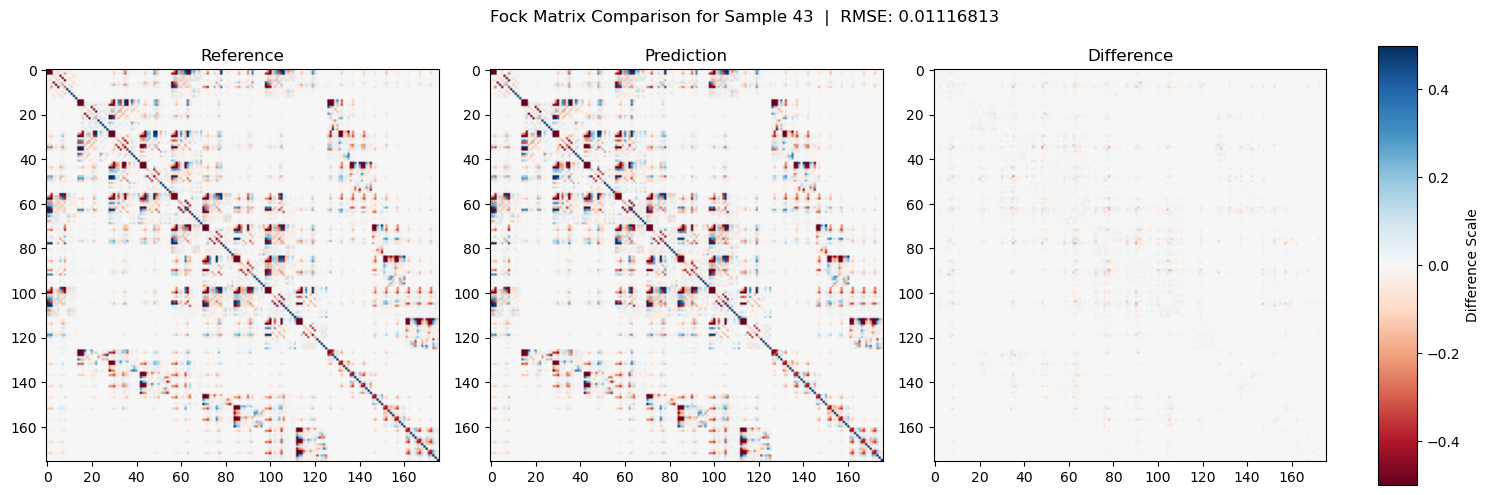

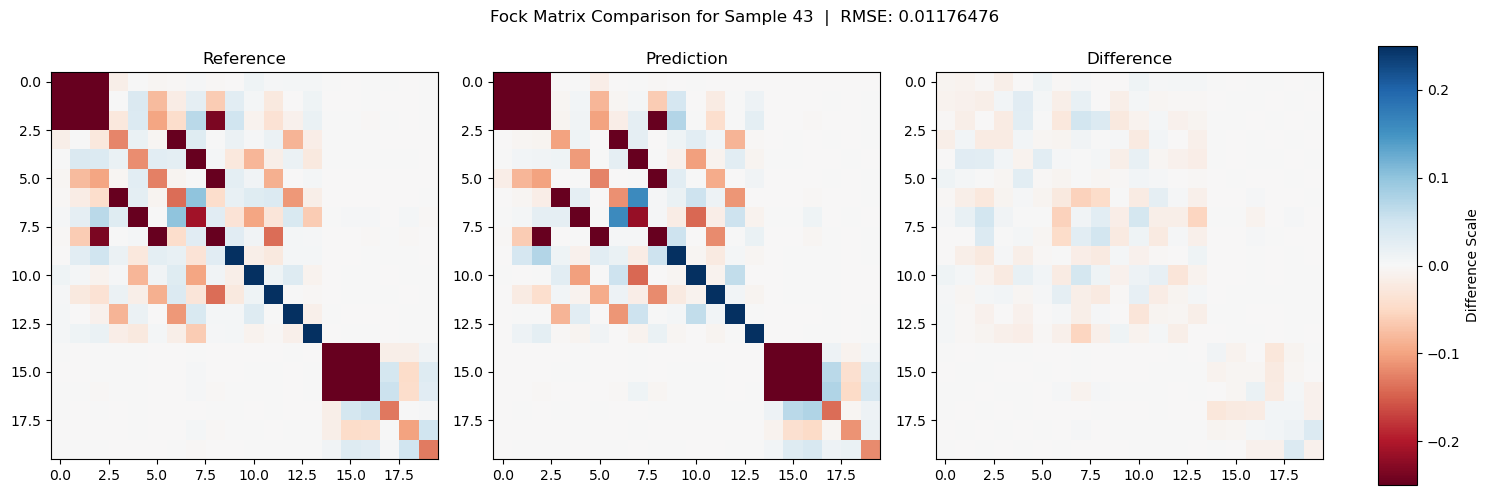

In [ ]:
# aux code for testing
sys.path.append('../../')
from utils import plot_mat_comp

randsample_id = np.random.randint(0, len(test_graphs))
print(f"Testing on random sample with id {randsample_id}")
test_graph = test_graphs[randsample_id]
fock_pred = MGNN.predict([test_graph])[0]
fock_true = MGNN.get_ground_truth("test")[randsample_id]
plot_mat_comp(fock_pred, fock_true,
                     title=f"Fock Matrix Comparison for Sample {randsample_id}", vmax=0.5)
plot_mat_comp(fock_pred[:20, :20], fock_true[:20, :20],
                     title=f"Fock Matrix Comparison for Sample {randsample_id}", vmax=0.25)

Ovlp: [[1.         0.26261654 0.1722097  0.         0.         0.
  0.         0.         0.         0.        ]
 [0.26261654 1.         0.78225493 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.1722097  0.78225493 1.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.46949825 0.         0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.46949825 0.         0.        ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.46949825 0.        ]
 [0.         0.         0.         0.46949825 0.         0.
  1.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.46949825 0.
  0.         1.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.46949825
  0.         0.         1.         0.        ]
 [0.         0.        

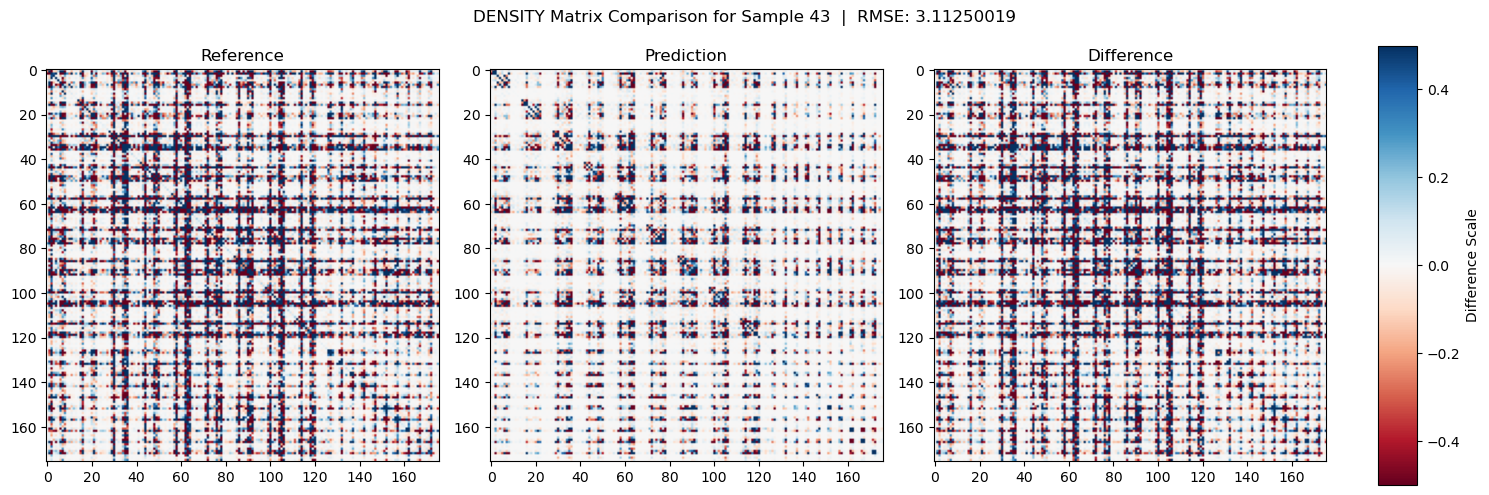

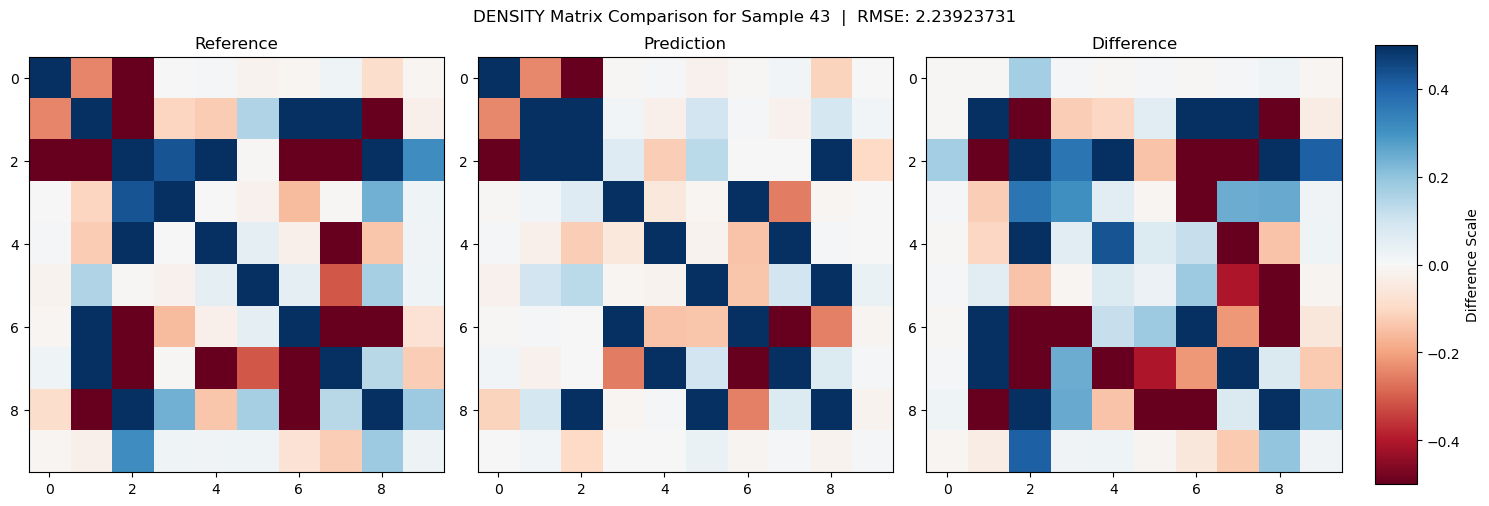

In [ ]:
density_pred, density_truth = MGNN.predict([test_graph], include_target=True, transform_to_density=True)[0]
plot_mat_comp(density_pred, density_truth, 
                     title=f"DENSITY Matrix Comparison for Sample {randsample_id}", vmax=0.5)
plot_mat_comp(density_pred[:10,:10], density_truth[:10,:10], 
                     title=f"DENSITY Matrix Comparison for Sample {randsample_id}", vmax=0.5)

# Sanity check & test against ref sim!

In [ ]:
from scf_guess_tools import load, calculate
from scipy.linalg import eigh
from pyscf import gto, scf

In [ ]:
rand_file = MGNN.get_files("test")[randsample_id]
mol = load(rand_file, basis=BASIS_PATH, backend=Backend.PY)
wf = calculate(mol, basis=BASIS_PATH, functional="b3lypg", method="dft")
fock_recalc = wf.fock().numpy
density_recalc = wf.density().numpy

converged SCF energy = -423.012580534168


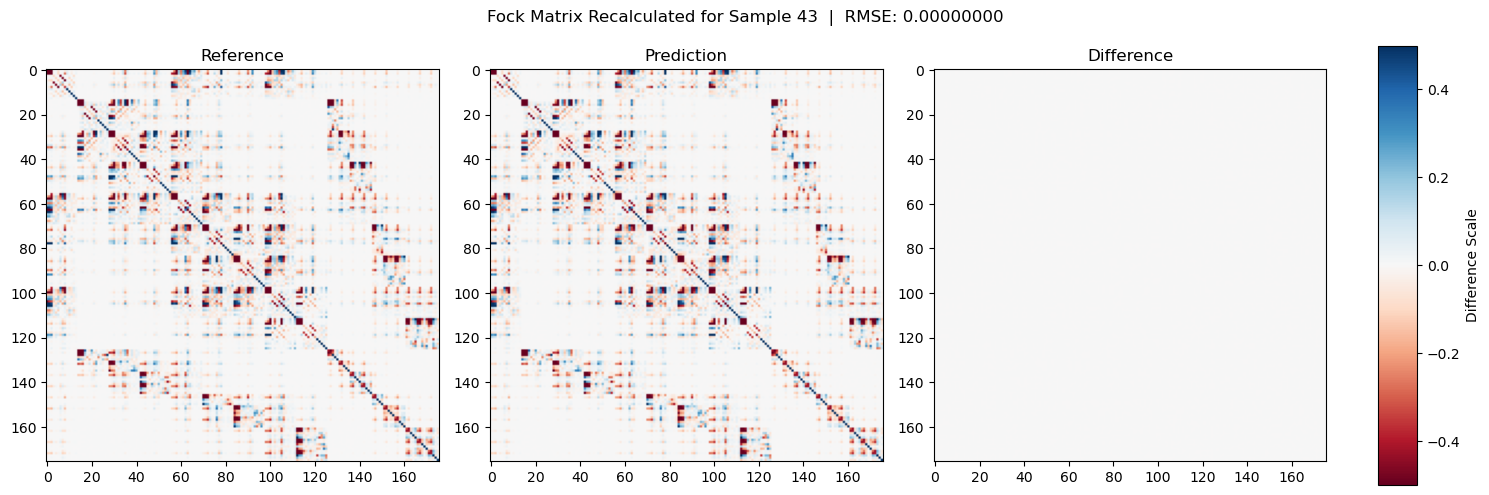

In [ ]:
plot_mat_comp(fock_recalc, fock_true,
                     title=f"Fock Matrix Recalculated for Sample {randsample_id}", vmax=0.5)

ok there is no difference to the recalc vs. ground truth! Next check if we reconstruct the density correctly! 

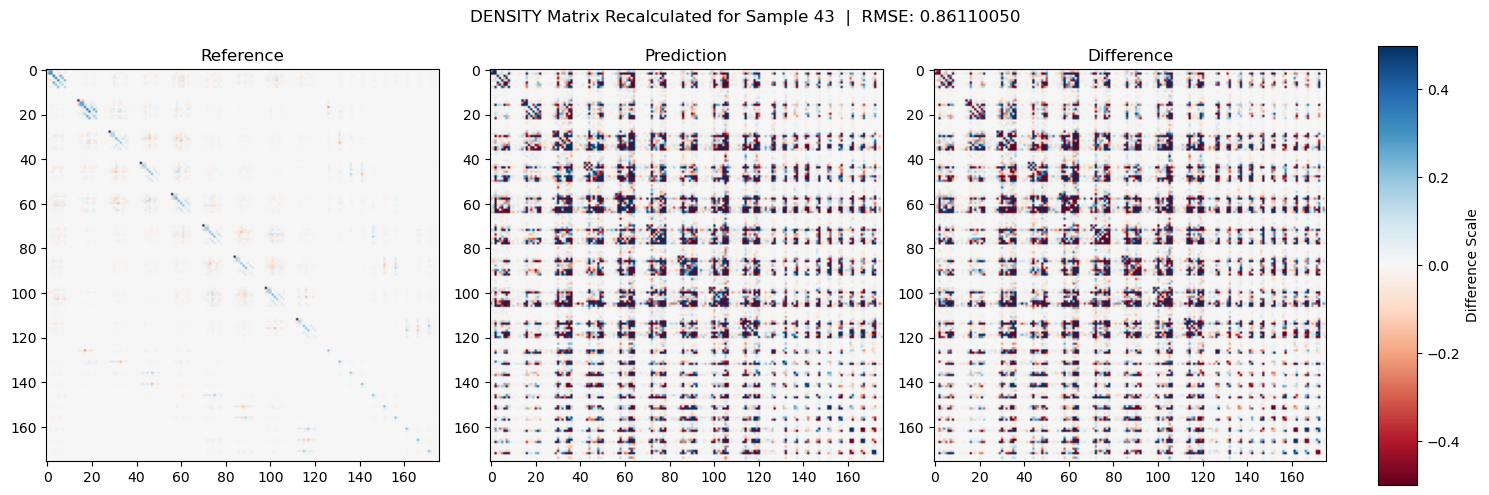

In [ ]:
plot_mat_comp(density_recalc, density_truth, 
                     title=f"DENSITY Matrix Recalculated for Sample {randsample_id}", vmax=0.5)

No there is something odd going on - we fail the reconstruction! 

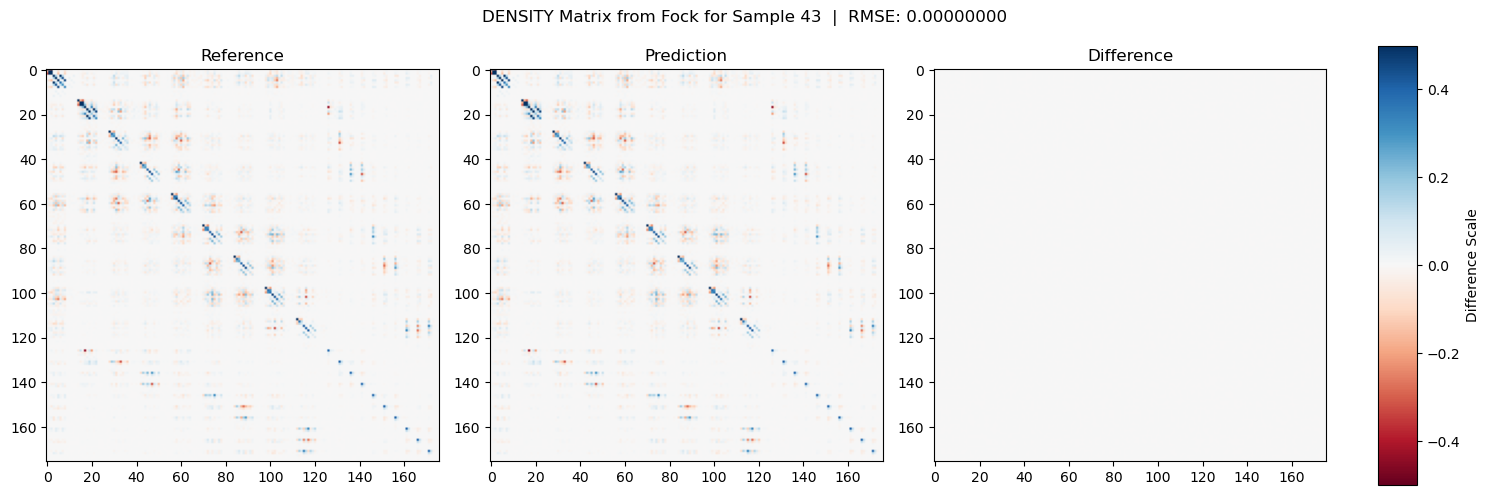

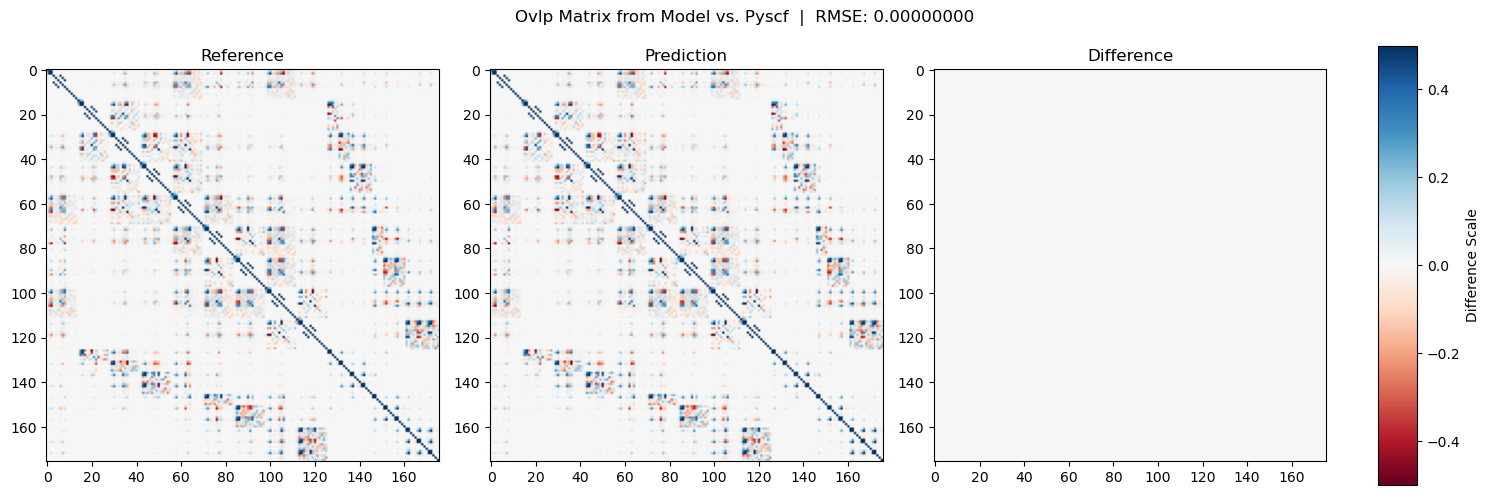

In [ ]:
# manually reconstruct density from fock: 
def check_positive_definite(S, tol=1e-10):
    eigvals = np.linalg.eigvalsh(S)
    is_pd = np.all(eigvals > tol)
    return is_pd

def density_from_fock(fock, overlap, nocc):
    assert check_positive_definite(overlap)
    _, C = eigh(fock, overlap)
    C_occ = C[:, :nocc]
    density = 2 * C_occ @ C_occ.T 
    return density

moln = mol.native
nocc = moln.nelectron // 2
density_from_fock_true = density_from_fock(fock_true, moln.intor("int1e_ovlp"), nocc)
density_from_fock_recalc = density_from_fock(fock_recalc, moln.intor("int1e_ovlp"), nocc)
plot_mat_comp(density_from_fock_recalc, density_from_fock_true, 
                     title=f"DENSITY Matrix from Fock for Sample {randsample_id}", vmax=0.5)
# ovlps from model
ovlp_for_trial = MGNN.get_source_mat("test")[randsample_id]
plot_mat_comp(ovlp_for_trial, moln.intor("int1e_ovlp"), title="Ovlp Matrix from Model vs. Pyscf", vmax=0.5) # ovlp is same! 